<a href="https://colab.research.google.com/github/Dinoryong/hanaro01/blob/main/copy_of_0601.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시각화 도구 (계속)

## seaborn (계속)

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 메뉴 - 런타임 - 런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (14.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122545 files and dir

In [ ]:
# 라이브러리 불러오기
import seaborn as sns

In [ ]:
# 내장 데이터 불러오기
titanic = sns.load_dataset("titanic")
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [ ]:
# 데이터 정보
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


### 비율 막대 그래프

In [ ]:
import matplotlib.pyplot as plt
# 스타일 테마
# darkgrid, whitegrid, dark, white, ticks
sns.set_style("whitegrid")

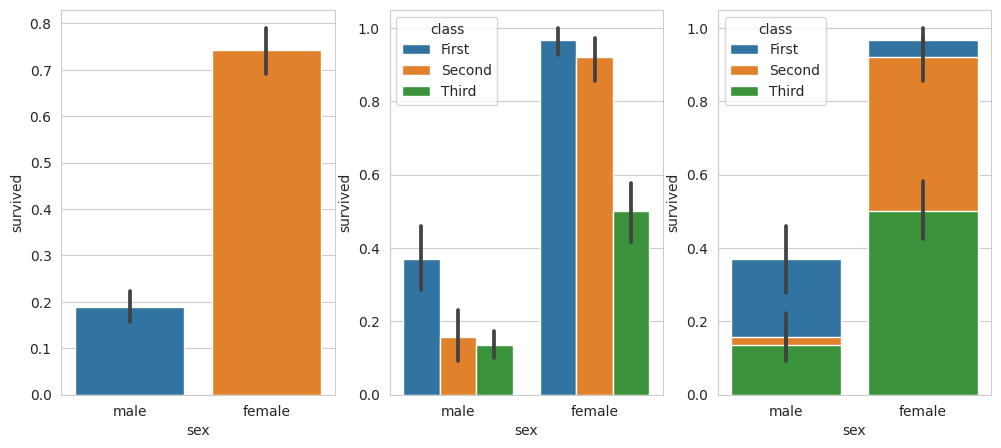

In [ ]:
# 그래프 객체 생성
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
# 막대 그래프 & 에러바
sns.barplot(x = 'sex', y = 'survived', data = titanic, ax = ax1)
sns.barplot(x = 'sex', y = 'survived', hue = 'class',
            data = titanic, ax = ax2)
sns.barplot(x = 'sex', y = 'survived', hue = 'class', dodge = False,
            data = titanic, ax = ax3)
# 줄 같이 생긴 것 = 에러바 (표준편차, 표준오차, 신뢰구간 등)
plt.show()

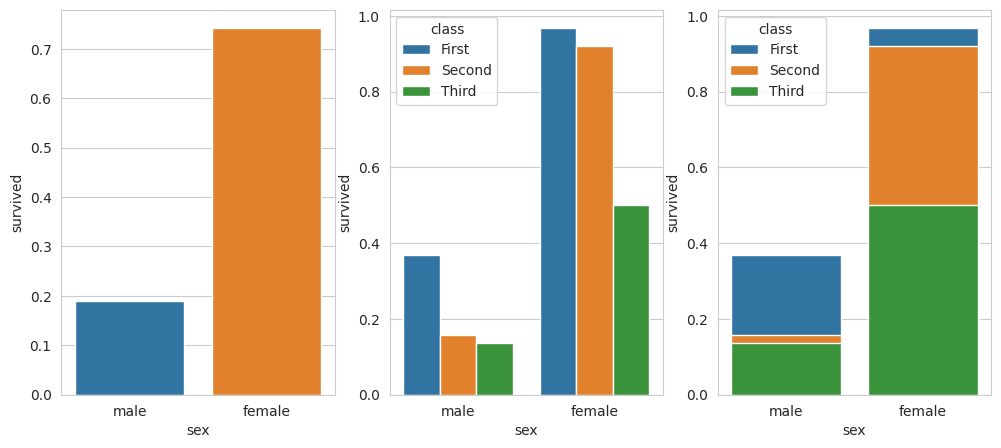

In [ ]:

# 그래프 객체 생성
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
# 막대 그래프 & 에러바 없이
sns.barplot(x = 'sex', y = 'survived', data = titanic, ax = ax1, errorbar = None)
sns.barplot(x = 'sex', y = 'survived', hue = 'class',
            data = titanic, ax = ax2, errorbar = None)
sns.barplot(x = 'sex', y = 'survived', hue = 'class', dodge = False,
            data = titanic, ax = ax3, errorbar = None)
# 줄 같이 생긴 것 = 에러바 (표준편차, 표준오차, 신뢰구간 등)
plt.show()

### 빈도 막대 그래프

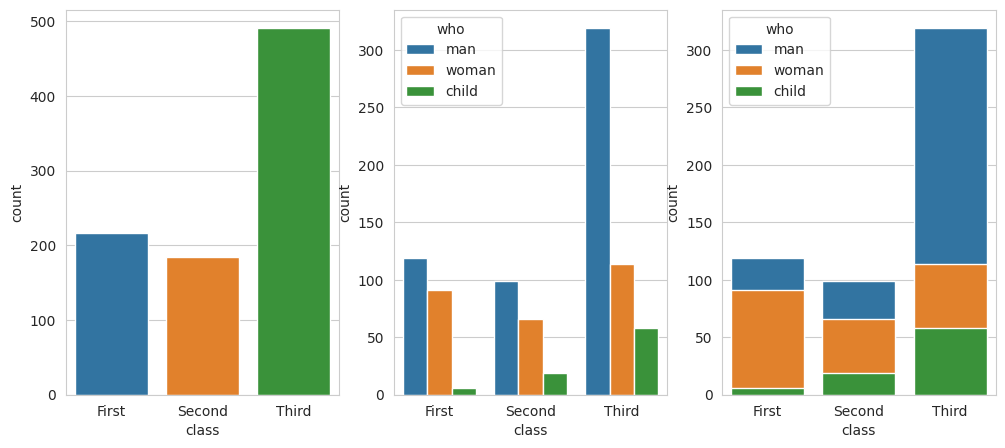

In [ ]:
# 그래프 객체 생성
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
# 막대 그래프
sns.countplot(x = 'class', data = titanic, ax = ax1)
sns.countplot(x = 'class', hue = 'who', 
              data = titanic, ax = ax2)
sns.countplot(x = 'class', hue = 'who', dodge = False, 
              data = titanic, ax = ax3) # 그래프만 누적
# 
plt.show()

<Axes: xlabel='class', ylabel='Count'>

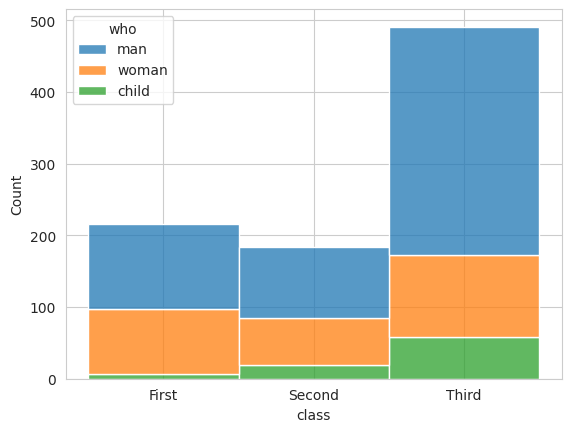

In [ ]:
sns.histplot(x = 'class', hue = 'who', multiple='stack', 
              data = titanic) # 빈도 누적 = 전체합

### 상자그림 & 바이올린 그림

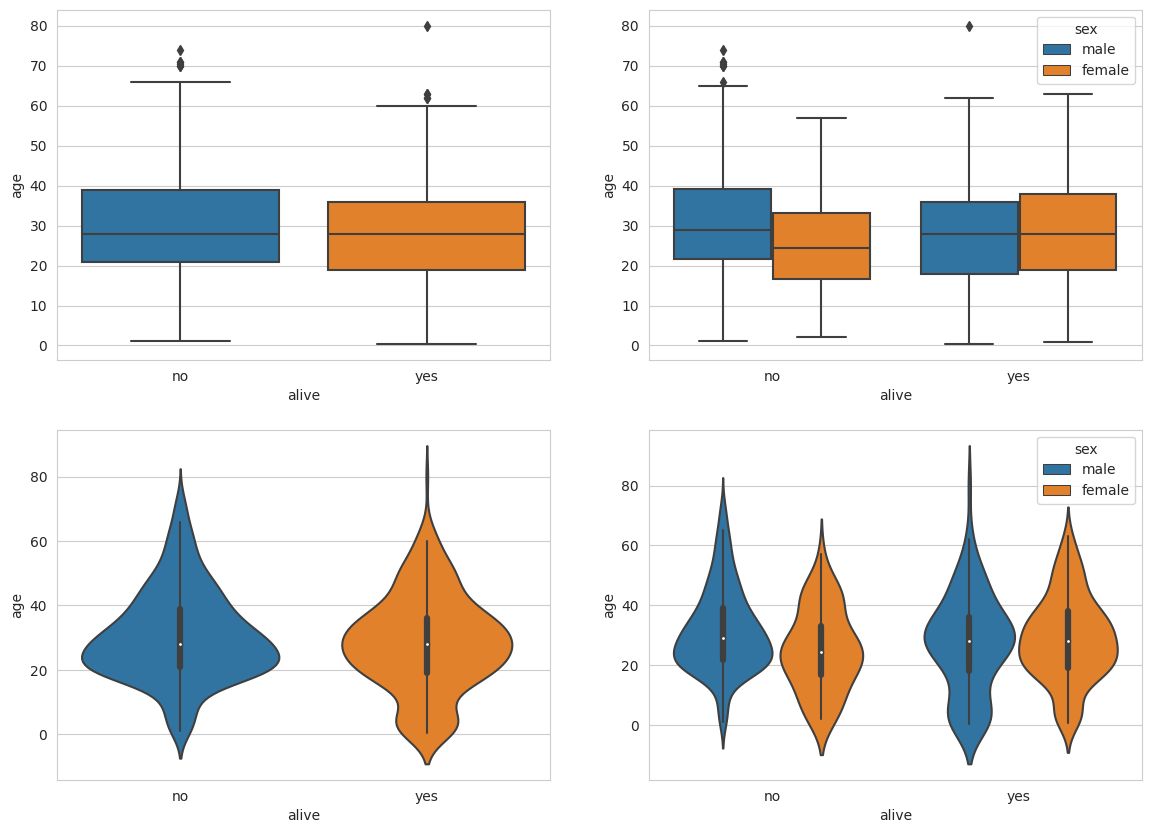

In [ ]:
# 그래프 객체 생성
fig = plt.figure(figsize = (14, 10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
# 상자 그림
sns.boxplot(x = 'alive', y = 'age', data = titanic, ax = ax1)
sns.boxplot(x = 'alive', y = 'age', hue = 'sex',
            data = titanic, ax = ax2)
# 바이올린 그림
sns.violinplot(x = 'alive', y = 'age', data = titanic, ax = ax3)
sns.violinplot(x = 'alive', y = 'age', hue = 'sex',
            data = titanic, ax = ax4)
# 
plt.show()

### 조인트 그림

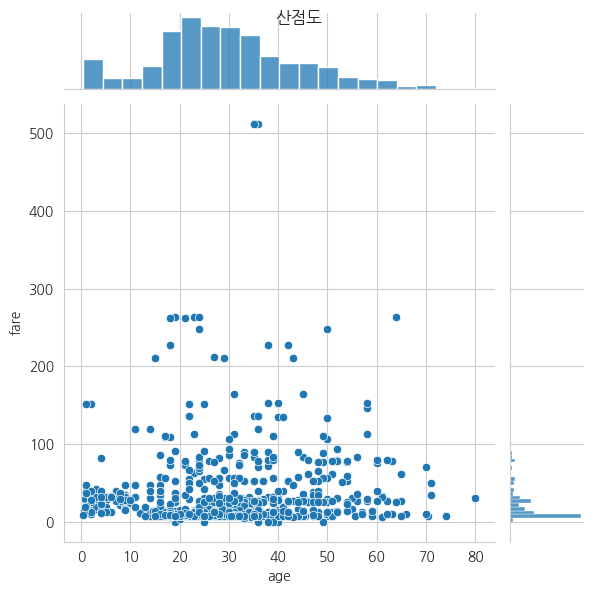

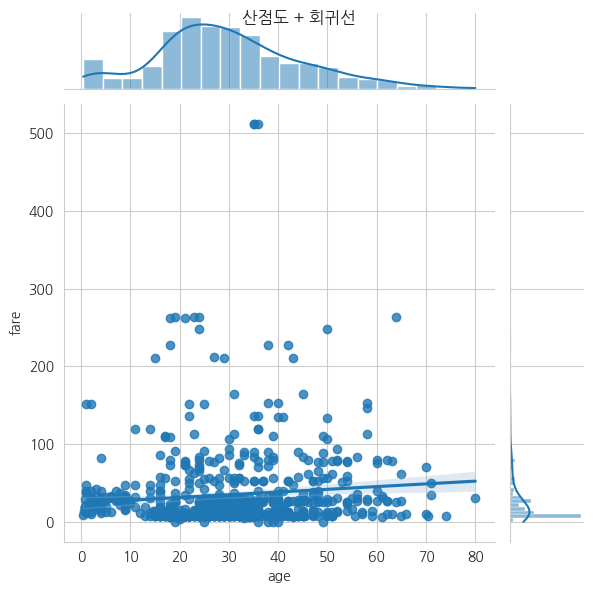

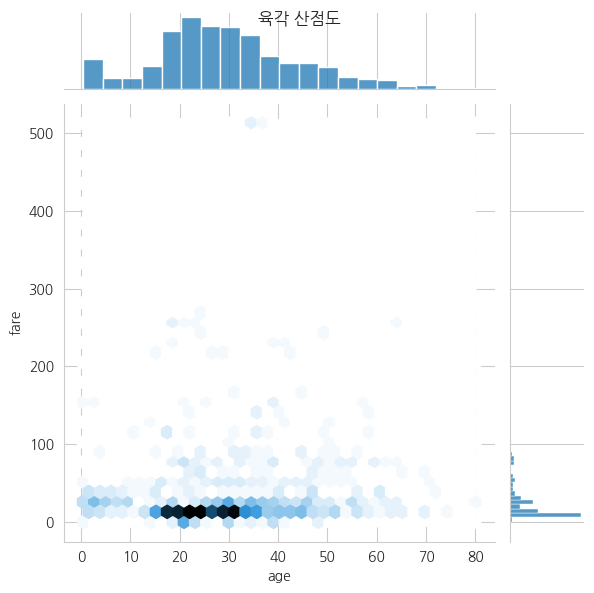

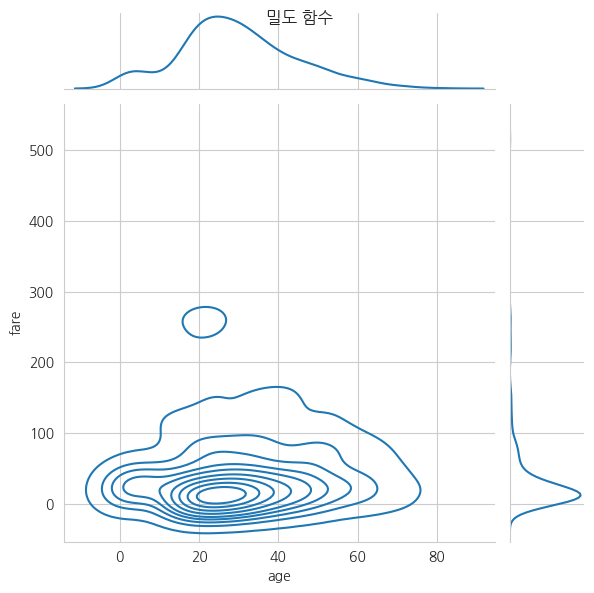

In [ ]:
# 한글 폰트 설정
plt.rc("font", family = "NanumGothic")
# 조인트 그림 - 산점도(기본값)
jp1 = sns.jointplot(x = 'age', y = 'fare', data = titanic)
# 조인트 그림 - 산점도 + 회귀선
jp2 = sns.jointplot(x = 'age', y = 'fare', kind = 'reg', data = titanic)
# 조인트 그림 - 육각 산점도
jp3 = sns.jointplot(x = 'age', y = 'fare', kind = 'hex', data = titanic)
# 조인트 그림 - 밀도 함수
jp4 = sns.jointplot(x = 'age', y = 'fare', kind = 'kde', data = titanic)
# 제목
jp1.fig.suptitle("산점도")
jp2.fig.suptitle("산점도 + 회귀선")
jp3.fig.suptitle("육각 산점도")
jp4.fig.suptitle("밀도 함수")
# 
plt.show()

### 그리드 분할

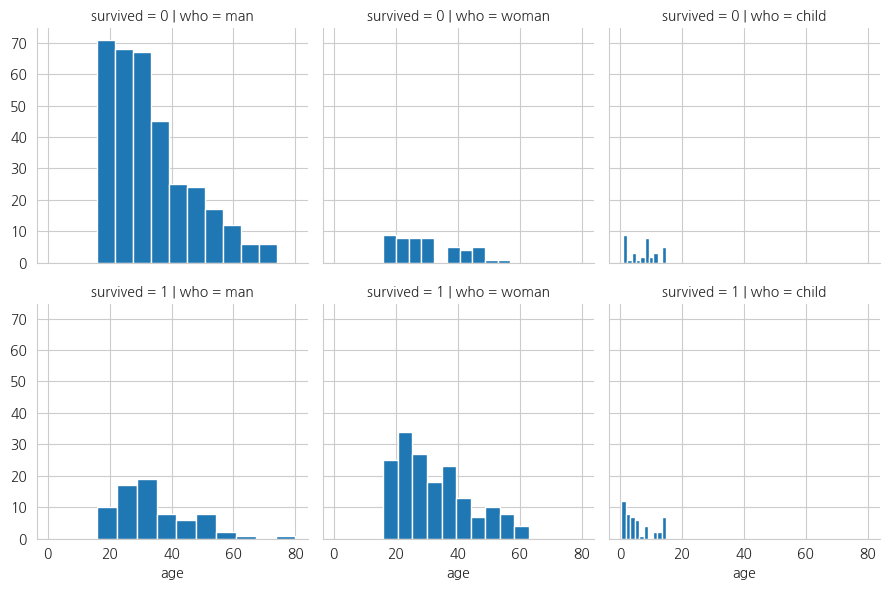

In [ ]:
# 그리드 분할 = 빈도표를 만들듯이 화면을 분할해서 시각화
grid = sns.FacetGrid(data = titanic,
                     row = 'survived',
                     col = 'who')
# 그래프 넣기
grid.map(plt.hist, 'age')
# 
plt.show()

### pairplot

In [ ]:
# 변수들을 2개씩 짝을 지어서 시각화
pair_data = titanic[['age', 'pclass', 'fare']]

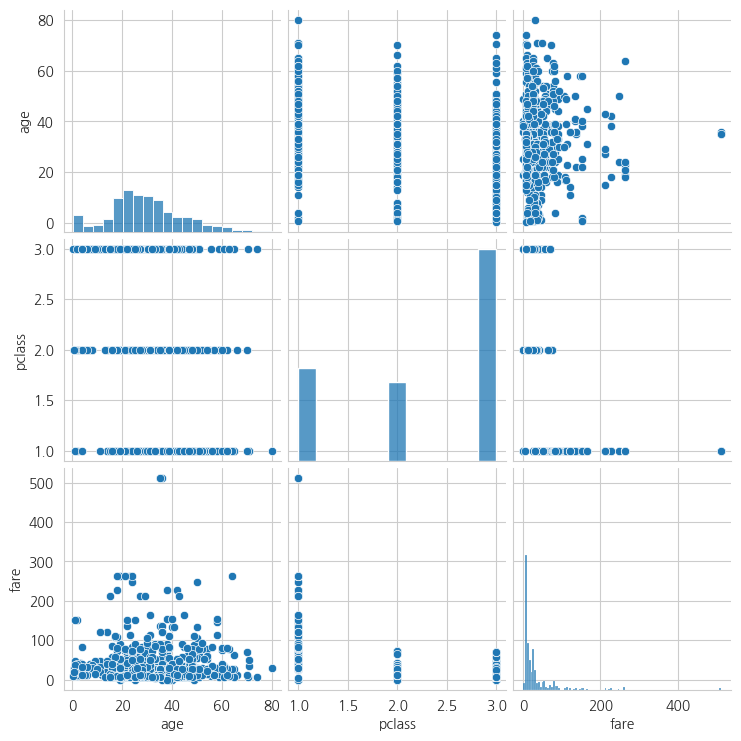

In [ ]:
sns.pairplot(pair_data)
# 
plt.show()

## 지도 시각화

In [ ]:
# 라이브러리 불러오기
import folium

In [ ]:
# 서울 지도 만들기
seoul_map = folium.Map(location = [37.55, 126.98], zoom_start = 12)
# 파일로 저장
seoul_map.save('./seoul_map.html')

In [ ]:
# 서울 지도 만들기 - 스타일 적용
seoul_map = folium.Map(location = [37.55, 126.98], zoom_start = 12,
                       tiles = 'Stamen Terrain')
# 파일로 저장
seoul_map.save('./seoul_map.html')

In [ ]:
# 서울 지도 만들기 - 스타일 적용
seoul_map = folium.Map(location = [37.55, 126.98], zoom_start = 12,
                       tiles = 'Stamen Toner')
# 파일로 저장
seoul_map.save('./seoul_map.html')

### 마커 표시

In [ ]:
import pandas as pd

In [ ]:
# 데이터 불러오기
df = pd.read_excel('/content/drive/MyDrive/HANARO/pandas datas/ch5/서울지역 대학교 위치.xlsx',
                   engine = 'openpyxl')
df.head()

,Unnamed: 0,위도,경도
0,KAIST 서울캠퍼스,37.592573,127.046737
1,KC대학교,37.548345,126.854797
2,가톨릭대학교(성신교정),37.585922,127.004328
3,가톨릭대학교(성의교정),37.499623,127.006065
4,감리교신학대학교,37.567645,126.961610


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = df.set_index('Unnamed: 0')

In [ ]:
df.head()

,위도,경도
Unnamed: 0,,
KAIST 서울캠퍼스,37.592573,127.046737
KC대학교,37.548345,126.854797
가톨릭대학교(성신교정),37.585922,127.004328
가톨릭대학교(성의교정),37.499623,127.006065
감리교신학대학교,37.567645,126.961610


In [ ]:
# 서울 지도 만들기 - 기본 마커
seoul_map = folium.Map(location = [37.55, 126.98], zoom_start = 12,
                       tiles = 'Stamen Terrain')
# 마커 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
  folium.Marker([lat,lng], popup = name).add_to(seoul_map)
# 파일로 저장
seoul_map.save('./seoul_univ.html')

In [ ]:
# 서울 지도 만들기 - 원형 마커
seoul_map = folium.Map(location = [37.55, 126.98], zoom_start = 12,
                       tiles = 'Stamen Terrain')
# 마커 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
  folium.CircleMarker([lat,lng], popup = name,
                      radius = 15, # 원 크기(반지름)
                      fill_color = 'coral', # 원 내부 색상
                      fill = True, # 채우기 활성화 여부
                      fill_opacity = 0.3, # 투명도
                      color = 'black').add_to(seoul_map) # 원 둘레 색상
# 파일로 저장
seoul_map.save('./seoul_univ1.html')

### 단계 구분도

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/HANARO/pandas datas/ch5/경기도인구데이터.xlsx',
                   index_col = '구분', engine = 'openpyxl')
df.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
구분,,,,,,,,,,,
수원시장안구,287474,285803,290798,293692,290999,291757,300908,301196,299016,296479,293828
수원시권선구,310553,308177,304097,306783,321176,332633,331773,339835,351053,358393,365653
수원시팔달구,216945,213235,219833,216503,209772,206794,204805,203479,199180,198515,193311
수원시영통구,252730,260210,258421,260557,266542,289074,310671,329718,335375,340654,349836
성남시수정구,256744,248452,242161,241070,236123,233997,228167,223539,219531,232841,236932


In [ ]:
import json
bnd = json.load(open('/content/drive/MyDrive/HANARO/pandas datas/ch5/경기도행정구역경계.json',
                encoding = 'utf-8'))
bnd

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': 31380,
    'name': '양평군',
    'name_eng': 'Yangpyeong-gun',
    'base_year': 2013},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.56113535909492, 37.6256560539258],
      [127.57290963929243, 37.61087369350498],
      [127.56366973908277, 37.5842624297699],
      [127.52226606559191, 37.5828628697518],
      [127.50048767007603, 37.569036373178626],
      [127.47687473909174, 37.574448241913856],
      [127.47565866803647, 37.60512112601634],
      [127.44699730711024, 37.64497584741164],
      [127.4272349102434, 37.66284420898682],
      [127.40156700708162, 37.64806970784708],
      [127.3732642199939, 37.6453987554284],
      [127.3542931884407, 37.6250006376975],
      [127.34360057873045, 37.588997440929354],
      [127.31002843450217, 37.53523876142835],
      [127.30923294884336, 37.5135706079458],
      [127.32809611134748, 37.53133849534739],
      [127.3663244453597, 37.5

In [ ]:
# 열 이름 데이터 타입을 문자열로 변환
df.columns = df.columns.map(str)

In [ ]:
bnd

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': 31380,
    'name': '양평군',
    'name_eng': 'Yangpyeong-gun',
    'base_year': 2013},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.56113535909492, 37.6256560539258],
      [127.57290963929243, 37.61087369350498],
      [127.56366973908277, 37.5842624297699],
      [127.52226606559191, 37.5828628697518],
      [127.50048767007603, 37.569036373178626],
      [127.47687473909174, 37.574448241913856],
      [127.47565866803647, 37.60512112601634],
      [127.44699730711024, 37.64497584741164],
      [127.4272349102434, 37.66284420898682],
      [127.40156700708162, 37.64806970784708],
      [127.3732642199939, 37.6453987554284],
      [127.3542931884407, 37.6250006376975],
      [127.34360057873045, 37.588997440929354],
      [127.31002843450217, 37.53523876142835],
      [127.30923294884336, 37.5135706079458],
      [127.32809611134748, 37.53133849534739],
      [127.3663244453597, 37.5

In [ ]:
# 경기도 지도 만들기
ggd_map = folium.Map(location = [37.55, 126.98], zoom_start = 9,
                       tiles = 'Stamen Terrain')
# 단계 구분도 - 2007년
year = "2007"
folium.Choropleth(geo_data = bnd, # 지도 데이터 = 경기도 경계선
                  data = df[year], # 인구 데이터 = 색깔로 표현할 값
                  columns = [df.index, df[year]], # 지역의 이름, 해당 연도 인구
                  fill_color = 'Reds', # ColorBrewer code
                  fill_opacity = 0.3, # 다각형 내부 색상 투명도
                  line_opacity = 0.5, # 선 투명도
                  # 지도 데이터와 인구 데이터를 연결하는 내용 = 지역 이름
                  # 원래 features 이지만, 공식 문서 문법 표기상 feature 사용
                  key_on = 'feature.properties.name').add_to(ggd_map)
# 파일로 저장
ggd_map.save('./ggd_' + year + '.html')

In [ ]:
# 경기도 지도 만들기
ggd_map = folium.Map(location = [37.55, 126.98], zoom_start = 9,
                       tiles = 'Stamen Terrain')
# 단계 구분도 - 2017년
year = "2017"
folium.Choropleth(geo_data = bnd, data = df[year],
                  columns = [df.index, df[year]],
                  fill_color = 'Reds', # ColorBrewer code
                  fill_opacity = 0.3,
                  line_opacity = 0.5,
                  key_on = 'feature.properties.name').add_to(ggd_map)
# 파일로 저장
ggd_map.save('./ggd_' + year + '.html')

# 데이터 전처리

## 널값

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import seaborn as sns

### 널값 확인

In [ ]:
# = 비어 있는 데이터(값) = 누락 데이터
df = sns.load_dataset('titanic')
df.info()
# Non-Null Count
# 전체 행 개수가 891개 이므로 Non-Null Count도 891개가 되어야 널값이 없는 것
# 891개보다 적으면 널값이 있으니 확인!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# 빈도표 = 해당 열 고유값 & NaN 미포함
df['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [ ]:
# 빈도표 = 해당 열 고유값 & NaN 포함
df['deck'].value_counts(dropna = False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [ ]:
# 널값을 직접 확인
# isnull() 의 결과가 True = 널값, False = 널값이 아님
df.head().isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
# isnull() 의 결과가 True = 널값이 아님, False = 널값
df.head().notnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True


### 널값 개수

In [ ]:
# 널값 개수 합 = 열 단위로 계산하는 것이 기본
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# 열 단위로 계산
df.isnull().sum(axis = 0)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# 행 단위로 계산
df.isnull().sum(axis = 1)

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64

In [ ]:
# 널값 개수
# 다음 문법으로는 우리가 원하는 열의 널값 개수를 확인할 수 없음
df.isnull().value_counts()
df.notnull().value_counts()

survived  pclass  sex   age    sibsp  parch  fare  embarked  class  who   adult_male  deck   embark_town  alive  alone
True      True    True  True   True   True   True  True      True   True  True        False  True         True   True     530
                                                                                      True   True         True   True     182
                        False  True   True   True  True      True   True  True        False  True         True   True     158
                                                                                      True   True         True   True      19
                        True   True   True   True  False     True   True  True        True   False        True   True       2
dtype: int64

In [ ]:
# 반복문으로 해결 - 우리가 원하는 열의 널값 개수를 확인 가능
for column in df.columns:
  print(df[column].isnull().value_counts())

False    891
Name: survived, dtype: int64
False    891
Name: pclass, dtype: int64
False    891
Name: sex, dtype: int64
False    714
True     177
Name: age, dtype: int64
False    891
Name: sibsp, dtype: int64
False    891
Name: parch, dtype: int64
False    891
Name: fare, dtype: int64
False    889
True       2
Name: embarked, dtype: int64
False    891
Name: class, dtype: int64
False    891
Name: who, dtype: int64
False    891
Name: adult_male, dtype: int64
True     688
False    203
Name: deck, dtype: int64
False    889
True       2
Name: embark_town, dtype: int64
False    891
Name: alive, dtype: int64
False    891
Name: alone, dtype: int64


### 널값 제거

In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
# 특정 개수 이상의 널값이 있는 열 삭제
df = df.dropna(axis = 1, thresh = 300)

In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [ ]:
# 널값이 있는 행 삭제
# any = 행 기준으로 널값이 하나라도 있으면 삭제
df.dropna(subset = 'age', how = 'any')
# = df.dropna(subset = 'age', how = 'any', axis = 0)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
# all = 행 기준으로 모두 널값이면 삭제
# df.dropna(subset = 'age', how = 'all')

### 널값 대체 imputation

#### 평균

In [ ]:
# 평균으로 대체
age_mean = df['age'].mean()

In [ ]:
df['age'].fillna(age_mean)
# df['age'].fillna(age_mean, inplace = True) <= 원본 변경

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

#### 최빈값

In [ ]:
# 널값을 직접 찾아서 확인
df[df['embark_town'].isnull() == True]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True


In [ ]:
# 널값 확인
df['embark_town'][826:831]

826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
830      Cherbourg
Name: embark_town, dtype: object

In [ ]:
# 최빈값 가져오기
town_mode = df['embark_town'].value_counts().idxmax()

In [ ]:
# 최빈값으로 대체
df['embark_town'].fillna(town_mode, inplace = True)

In [ ]:
# 대체 결과 확인
df['embark_town'][826:831]

826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
830      Cherbourg
Name: embark_town, dtype: object

In [ ]:
# 널값 확인
df['embark_town'].isnull().value_counts()

False    891
Name: embark_town, dtype: int64

In [ ]:
# 최빈값 확인
df['embark_town'].value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [ ]:
# 최빈값 가져오기
town_mode = df['embark_town'].value_counts().idxmax()

In [ ]:
# 최빈값으로 대체
df['embark_town'].fillna(town_mode, inplace = True)

In [ ]:
# 대체 결과 확인
df['embark_town'].isnull().value_counts()

False    891
Name: embark_town, dtype: int64

### 주변의 값

In [ ]:
# 널값을 직접 찾아서 확인
df[df['embarked'].isnull() == True]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,Southampton,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,Southampton,yes,True


In [ ]:
# 널값 확인
df['embarked'][826:831]

826      S
827      C
828      Q
829    NaN
830      C
Name: embarked, dtype: object

In [ ]:
# 앞에 있는 값으로 대체
df['embarked'].fillna(method = 'ffill')[826:831]

826    S
827    C
828    Q
829    Q
830    C
Name: embarked, dtype: object

In [ ]:
# 뒤에 있는 값으로 대체
df['embarked'].fillna(method = 'bfill')[826:831]

826    S
827    C
828    Q
829    C
830    C
Name: embarked, dtype: object

## 중복 데이터

In [ ]:
# 중복 데이터 만들기
df = pd.DataFrame({'c1': ['a','a','b','a','b'],
                   'c2': [1,1,1,2,2],
                   'c3': [1,1,2,2,2]})

In [ ]:
# 중복 데이터 확인
print(df['c1'])
print(df['c1'].duplicated()) # True 가 중복이라는 의미

0    a
1    a
2    b
3    a
4    b
Name: c1, dtype: object
0    False
1     True
2    False
3     True
4     True
Name: c1, dtype: bool


In [ ]:
# 중복 데이터 제거
print(df['c1'])
print(df['c1'].drop_duplicates())

0    a
1    a
2    b
3    a
4    b
Name: c1, dtype: object
0    a
2    b
Name: c1, dtype: object


In [ ]:
# 중복 데이터 확인
print(df)
print(df.duplicated()) # True 가 중복이라는 의미

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2
0    False
1     True
2    False
3    False
4    False
dtype: bool


In [ ]:
# 중복 데이터 제거
print(df)
print(df.drop_duplicates())

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2
  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2


In [ ]:
# 중복 데이터 제거
print(df[['c2','c3']])
print(df[['c2','c3']].drop_duplicates()) # 부분집합으로 제거
print(df.drop_duplicates(subset = ['c2','c3'])) # 전체집합을 유지 & 특정열 중복 데이터 제거

   c2  c3
0   1   1
1   1   1
2   1   2
3   2   2
4   2   2
   c2  c3
0   1   1
2   1   2
3   2   2
  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2


## 데이터 표준화

### 단위 환산

In [ ]:
# 데이터 불러오기
# csv 파일 불러오기 + 열 이름이 없음(header = None)
df = pd.read_csv('/content/drive/MyDrive/HANARO/auto-mpg.csv', header = None)

In [ ]:
# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
              'acceleration', 'model_year', 'origin', 'car_name']

In [ ]:
# 연비 mpg = mile per gallon
# kpl = kilometer per liter
# 1 mpg = 0.425 kpl
kpl = 0.425
df['kpl'] = df['mpg'] * kpl
df['kpl'] = df['kpl'].round(1)